# Pre-trained Models & Transfer Learning

## 0. Download and load the model (new!)

In [1]:
from tensorflow.keras.applications import VGG16
  
# load the VGG16 network *pre-trained* on the ImageNet dataset
model = VGG16(weights="imagenet")

model.summary()

2022-07-08 14:26:19.769498: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## 1, 2 (as before, load & look at data)

(1200, 1800, 3)


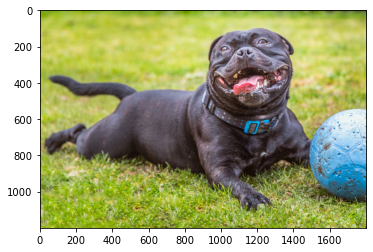

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    image = mpimg.imread(image_path)
    print(image.shape)
    plt.imshow(image)
    
show_image("data/doggy_door_images/happy_dog.jpg")

## 3 (as before: pre-process the data)

(2592, 3456, 3)
Original image shape:  (2592, 3456, 3)
Processed image shape:  (1, 224, 224, 3)


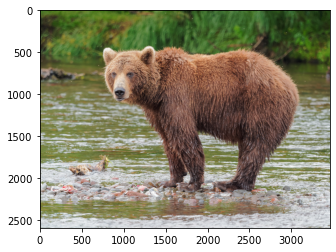

In [3]:
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.vgg16 import preprocess_input

def load_and_process_image(image_path):
    # Print image's original shape, for reference
    print('Original image shape: ', mpimg.imread(image_path).shape)
    
    # Load in the image with a target size of 224, 224
    image = image_utils.load_img(image_path, target_size=(224, 224))
    # Convert the image from a PIL format to a numpy array
    image = image_utils.img_to_array(image)
    # Add a dimension for number of images, in our case 1
    image = image.reshape(1,224,224,3)
    # Preprocess image to align with original ImageNet dataset
    image = preprocess_input(image)
    # Print image's shape after processing
    print('Processed image shape: ', image.shape)
    return image

show_image("data/doggy_door_images/brown_bear.jpg")
processed_image = load_and_process_image("data/doggy_door_images/brown_bear.jpg")

## 4. Make Prediction on New Data

In [4]:
from tensorflow.keras.applications.vgg16 import decode_predictions

def readable_prediction(image_path):
    # Show image
    show_image(image_path)
    # Load and pre-process image
    image = load_and_process_image(image_path)
    # Make predictions
    predictions = model.predict(image)
    # Print predictions in readable form
    print('Predicted:', decode_predictions(predictions, top=3))

(1200, 1800, 3)
Original image shape:  (1200, 1800, 3)
Processed image shape:  (1, 224, 224, 3)


2022-07-08 14:26:49.423281: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Predicted: [[('n02093256', 'Staffordshire_bullterrier', 0.45098123), ('n02110958', 'pug', 0.32263234), ('n02099712', 'Labrador_retriever', 0.0934318)]]


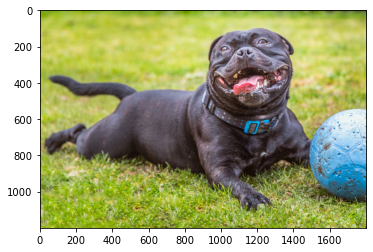

In [5]:
readable_prediction("data/doggy_door_images/happy_dog.jpg")

(2592, 3456, 3)
Original image shape:  (2592, 3456, 3)
Processed image shape:  (1, 224, 224, 3)
Predicted: [[('n02132136', 'brown_bear', 0.98538613), ('n02133161', 'American_black_bear', 0.013876267), ('n02410509', 'bison', 0.00026603724)]]


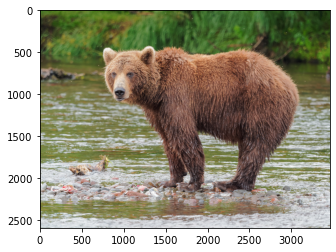

In [6]:
readable_prediction("data/doggy_door_images/brown_bear.jpg")

(1200, 1800, 3)
Original image shape:  (1200, 1800, 3)
Processed image shape:  (1, 224, 224, 3)
Predicted: [[('n02123159', 'tiger_cat', 0.7365475), ('n02124075', 'Egyptian_cat', 0.17492668), ('n02123045', 'tabby', 0.04588384)]]


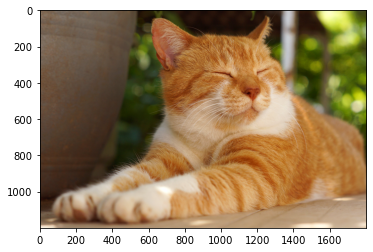

In [7]:
readable_prediction("data/doggy_door_images/sleepy_cat.jpg")

### Only dogs

In [8]:
import numpy as np

def doggy_door(image_path):
    show_image(image_path)
    image = load_and_process_image(image_path)
    preds = model.predict(image)
    if 151 <= np.argmax(preds) <= 268:
        print("Doggy come on in!")
    elif 281 <= np.argmax(preds) <= 285:
        print("Kitty stay inside!")
    else:
        print("You're not a dog! Stay outside!")

(2592, 3456, 3)
Original image shape:  (2592, 3456, 3)
Processed image shape:  (1, 224, 224, 3)
You're not a dog! Stay outside!


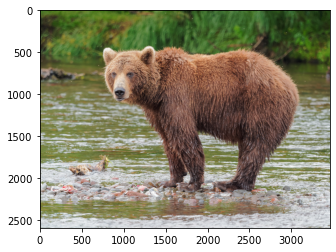

In [9]:
doggy_door("data/doggy_door_images/brown_bear.jpg")

(1200, 1800, 3)
Original image shape:  (1200, 1800, 3)
Processed image shape:  (1, 224, 224, 3)
Doggy come on in!


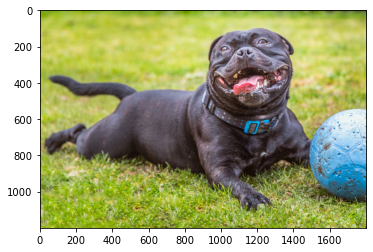

In [10]:
doggy_door("data/doggy_door_images/happy_dog.jpg")

(1200, 1800, 3)
Original image shape:  (1200, 1800, 3)
Processed image shape:  (1, 224, 224, 3)
Kitty stay inside!


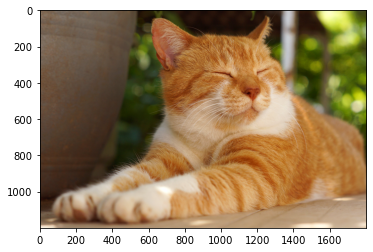

In [11]:
doggy_door("data/doggy_door_images/sleepy_cat.jpg")

# Transfer Learning

## 0. Download and load the model

In [2]:
from tensorflow import keras

base_model = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False) # remove the last layer of the model

base_model.summary()

2022-07-09 09:23:08.927370: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## 1. Freeze Base Model & Add New Layers

In [3]:
base_model.trainable = False # freeze base model

inputs = keras.Input(shape=(224, 224, 3))
# Separately from setting trainable on the model, we set training to False 
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________


In [4]:
# Important to use binary crossentropy and binary accuracy as we now have a binary classification problem
model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True), 
              metrics=[keras.metrics.BinaryAccuracy()])

## 2. Augment the data

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data generator
datagen_train = ImageDataGenerator(
    samplewise_center=True,  # set each sample mean to 0
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,
)  # we don't expect Bo to be upside-down so we will not flip vertically

# No need to augment validation data
datagen_valid = ImageDataGenerator(samplewise_center=True)

## 3. Load the data

In [6]:
# load and iterate training dataset
train_it = datagen_train.flow_from_directory(
    "data/presidential_doggy_door/train/",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="binary",
    batch_size=8,
)

# load and iterate validation dataset
valid_it = datagen_valid.flow_from_directory(
    "data/presidential_doggy_door/valid/",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="binary",
    batch_size=8,
)

Found 139 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


## 4. Train/fit the model

In [7]:
model.fit(train_it, 
          steps_per_epoch=12, 
          validation_data=valid_it, 
          validation_steps=4, 
          epochs=20)

Epoch 1/20
12/12 [==============================] - 10s 769ms/step - loss: 1.4374 - binary_accuracy: 0.7582 - val_loss: 1.7098 - val_binary_accuracy: 0.7000
Epoch 2/20
12/12 [==============================] - 9s 773ms/step - loss: 0.9840 - binary_accuracy: 0.7582 - val_loss: 0.9695 - val_binary_accuracy: 0.7667
Epoch 3/20
12/12 [==============================] - 9s 768ms/step - loss: 0.4509 - binary_accuracy: 0.8132 - val_loss: 0.5908 - val_binary_accuracy: 0.8000
Epoch 4/20
12/12 [==============================] - 9s 770ms/step - loss: 0.1360 - binary_accuracy: 0.9451 - val_loss: 0.4155 - val_binary_accuracy: 0.9000
Epoch 5/20
12/12 [==============================] - 11s 886ms/step - loss: 0.1852 - binary_accuracy: 0.9375 - val_loss: 0.2814 - val_binary_accuracy: 0.9333
Epoch 6/20
12/12 [==============================] - 10s 817ms/step - loss: 0.1661 - binary_accuracy: 0.9451 - val_loss: 0.1805 - val_binary_accuracy: 0.9333
Epoch 7/20
12/12 [==============================] - 11s 912ms

## 5. Fine-Tuning the model

In [9]:
# Unfreeze the base model
base_model.trainable = True

# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are taken into account
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate = .00001),  # Very low learning rate
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [10]:
model.fit(train_it, 
          steps_per_epoch=12, 
          validation_data=valid_it, 
          validation_steps=4, 
          epochs=10)

Epoch 1/10
12/12 [==============================] - 29s 2s/step - loss: 0.0269 - binary_accuracy: 0.9890 - val_loss: 0.0015 - val_binary_accuracy: 1.0000
Epoch 2/10
12/12 [==============================] - 28s 2s/step - loss: 0.0014 - binary_accuracy: 1.0000 - val_loss: 5.7135e-04 - val_binary_accuracy: 1.0000
Epoch 3/10
12/12 [==============================] - 28s 2s/step - loss: 2.8213e-05 - binary_accuracy: 1.0000 - val_loss: 5.7087e-04 - val_binary_accuracy: 1.0000
Epoch 4/10
12/12 [==============================] - 29s 2s/step - loss: 5.9209e-06 - binary_accuracy: 1.0000 - val_loss: 5.6270e-04 - val_binary_accuracy: 1.0000
Epoch 5/10
12/12 [==============================] - 29s 2s/step - loss: 3.4030e-05 - binary_accuracy: 1.0000 - val_loss: 5.7915e-04 - val_binary_accuracy: 1.0000
Epoch 6/10
12/12 [==============================] - 28s 2s/step - loss: 5.8161e-06 - binary_accuracy: 1.0000 - val_loss: 5.4422e-04 - val_binary_accuracy: 1.0000
Epoch 7/10
12/12 [======================

## 6. Make predictions with the model

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

def make_predictions(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    return preds

1/1 [==============================] - 0s 250ms/step


array([[-29.330442]], dtype=float32)

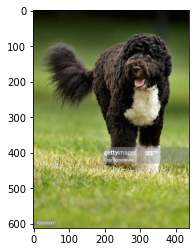

In [12]:
make_predictions('data/presidential_doggy_door/valid/bo/bo_20.jpg')

1/1 [==============================] - 0s 98ms/step


array([[26.952894]], dtype=float32)

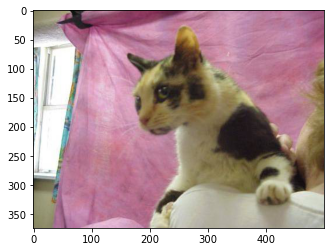

In [13]:
make_predictions('data/presidential_doggy_door/valid/not_bo/121.jpg')

In [14]:
def presidential_doggy_door(image_path):
    preds = make_predictions(image_path)
    if preds[0] < 0:
        print("It's Bo! Let him in!")
    else:
        print("That's not Bo! Stay out!")

1/1 [==============================] - 0s 96ms/step
That's not Bo! Stay out!


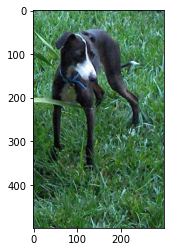

In [15]:
presidential_doggy_door('data/presidential_doggy_door/valid/not_bo/131.jpg')

1/1 [==============================] - 0s 89ms/step
It's Bo! Let him in!


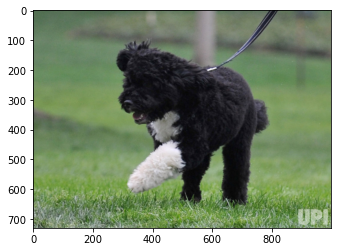

In [16]:
presidential_doggy_door('data/presidential_doggy_door/valid/bo/bo_29.jpg')